<a href="https://colab.research.google.com/github/shamim237/Bangla-Sign-digit-recognition/blob/main/HOG_SVM_SIGN_digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
from skimage.feature import hog
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
#img_dir = '/content/drive/MyDrive/digit_dataset/'

In [ ]:
#categories = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
#data = []

#for category in categories:
  #path = os.path.join(img_dir, category)
  #label = categories.index(category)

  #for img in os.listdir(path):
    ##img_data = cv2.imread(img_path)
    #resized_img = cv2.resize(img_data, (128, 64))
    #fd, hog_image = hog(resized_img, orientations=15, pixels_per_cell=(8, 8),                	
                          #cells_per_block=(2, 2), visualize=True, multichannel= True)
    #image = np.array(hog_image).flatten()
    #data.append([image, label])

In [ ]:
#print(len(data))

In [ ]:
#pick_in = open('/content/drive/MyDrive/Colab Notebooks/data_hog_sign(2).pickle', 'wb')
#pickle.dump(data, pick_in)
#pick_in.close()


In [ ]:
pick_in = open('/content/drive/MyDrive/Colab Notebooks/data_hog_sign(2).pickle', 'rb')
data = pickle.load(pick_in)
pick_in.close()

In [ ]:
random.shuffle(data)
features = []
labels = []

In [ ]:
for feature,label in data:
    features.append(feature)
    labels.append(label)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, shuffle=True)

In [ ]:
lin = SVC(kernel='linear', C=10).fit(x_train, y_train)


In [ ]:
poly = SVC(kernel='poly', degree=3, C=3).fit(x_train, y_train)

In [ ]:

rbf = SVC(kernel='rbf').fit(x_train, y_train)

In [ ]:
poly_pred = poly.predict(x_test)


In [ ]:
lin_pred = lin.predict(x_test)

In [ ]:

rbf_pred = rbf.predict(x_test)

In [ ]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  96.29
F1 (Polynomial Kernel):  96.28


In [ ]:
lin_accuracy = accuracy_score(y_test, lin_pred)
lin_f1 = f1_score(y_test, lin_pred, average='weighted')
print('Accuracy (Linear Kernel): ', "%.2f" % (lin_accuracy*100))
print('F1 (Linear Kernel): ', "%.2f" % (lin_f1*100))

Accuracy (Linear Kernel):  95.35
F1 (Linear Kernel):  95.34


In [ ]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  96.20
F1 (RBF Kernel):  96.20


In [ ]:
cm = confusion_matrix(y_test, lin_pred) 

print(cm)

[[202   0   0   0   0   0   1   0   0   1]
 [  0 223   6   0   0   2   0   1   3   0]
 [  0   3 203   6   2   2   0   0   3   0]
 [  0   3  10 176   8   0   0   0   5   0]
 [  0   4   4   2 213   1   0   0   2   0]
 [  0   0   0   0   4 211   0   0   2   0]
 [  0   0   0   0   0   0 211   0   0   0]
 [  2   0   2   0   0   1   1 195   4   0]
 [  0   4   0   2   2   2   0   4 213   0]
 [  0   0   0   0   0   0   0   0   0 185]]


In [ ]:
cm = confusion_matrix(y_test, poly_pred) 

print(cm)

[[203   0   0   0   0   0   0   1   0   0]
 [  0 231   0   0   0   2   0   0   2   0]
 [  0  13 204   2   0   0   0   0   0   0]
 [  0   5  20 173   2   0   0   0   2   0]
 [  0   5   0   9 210   0   0   0   2   0]
 [  0   0   0   0   1 216   0   0   0   0]
 [  0   0   0   0   0   0 211   0   0   0]
 [  0   0   0   0   0   0   0 205   0   0]
 [  0   2   2   0   2   2   0   2 217   0]
 [  0   3   0   0   0   0   0   0   0 182]]


In [ ]:
cm = confusion_matrix(y_test, rbf_pred) 

print(cm)

[[203   0   0   0   0   0   0   1   0   0]
 [  0 232   1   0   0   2   0   0   0   0]
 [  0   3 209   4   2   0   0   0   1   0]
 [  0   4  16 178   4   0   0   0   0   0]
 [  0   0   2  13 211   0   0   0   0   0]
 [  0   0   0   0   0 215   0   0   2   0]
 [  0   0   0   0   0   0 211   0   0   0]
 [  0   3   1   0   0   0   0 199   2   0]
 [  0   1   1   1   0   2   0   6 216   0]
 [  3   5   0   0   1   0   0   0   0 176]]


Prediction is:  2


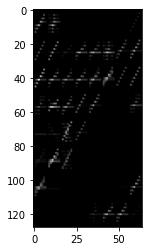

In [ ]:
categories = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

print('Prediction is: ', categories[rbf_pred[104]])

my_pred = x_test[104].reshape(128, 64)
plt.imshow(my_pred, cmap='binary_r')
plt.show()

In [ ]:
test_sample = x_test[6].reshape(1, 128*64)

test_sample.shape

(1, 8192)

In [ ]:
pred = poly.predict(test_sample)
pred

array([2])

In [ ]:
y_test[6]

2

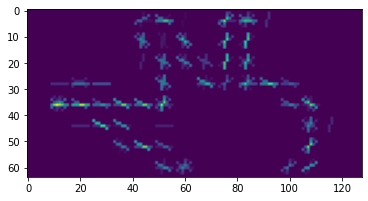

In [ ]:
img_data = cv2.imread('/content/8.jpg', 0)

ret,thresh1 = cv2.threshold(img_data,160,255,cv2.THRESH_BINARY)

resized_img = cv2.resize(thresh1, (128, 64))
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),                	
                          cells_per_block=(2, 2), visualize=True, multichannel= False)
image = np.array(hog_image).flatten()
plt.imshow(hog_image)

In [ ]:
image.shape

(8192,)

In [ ]:
test_sample = image.reshape(1, 128*64)

pred = rbf.predict(test_sample)
pred

array([8])